Car Diagnostic Pattern Recognition & Predictive Analytics
Dataset loaded: 10,000 records
Columns: ['Record ID', 'Car Name', 'Problem Classification', 'Problem Description', 'Severity', 'Diagnosis', 'How to Fix the Problem', 'Solution Used', 'ECU Data', 'Service History', 'Repair Status', 'Results']

Creating Advanced Diagnostic Features
Advanced diagnostic features created:
   - Diagnostic Difficulty range: 1 to 15
   - Average Maintenance Score: 0.48
   - Overall Repair Success Rate: 85.0%

Diagnostic Pattern Clustering Analysis


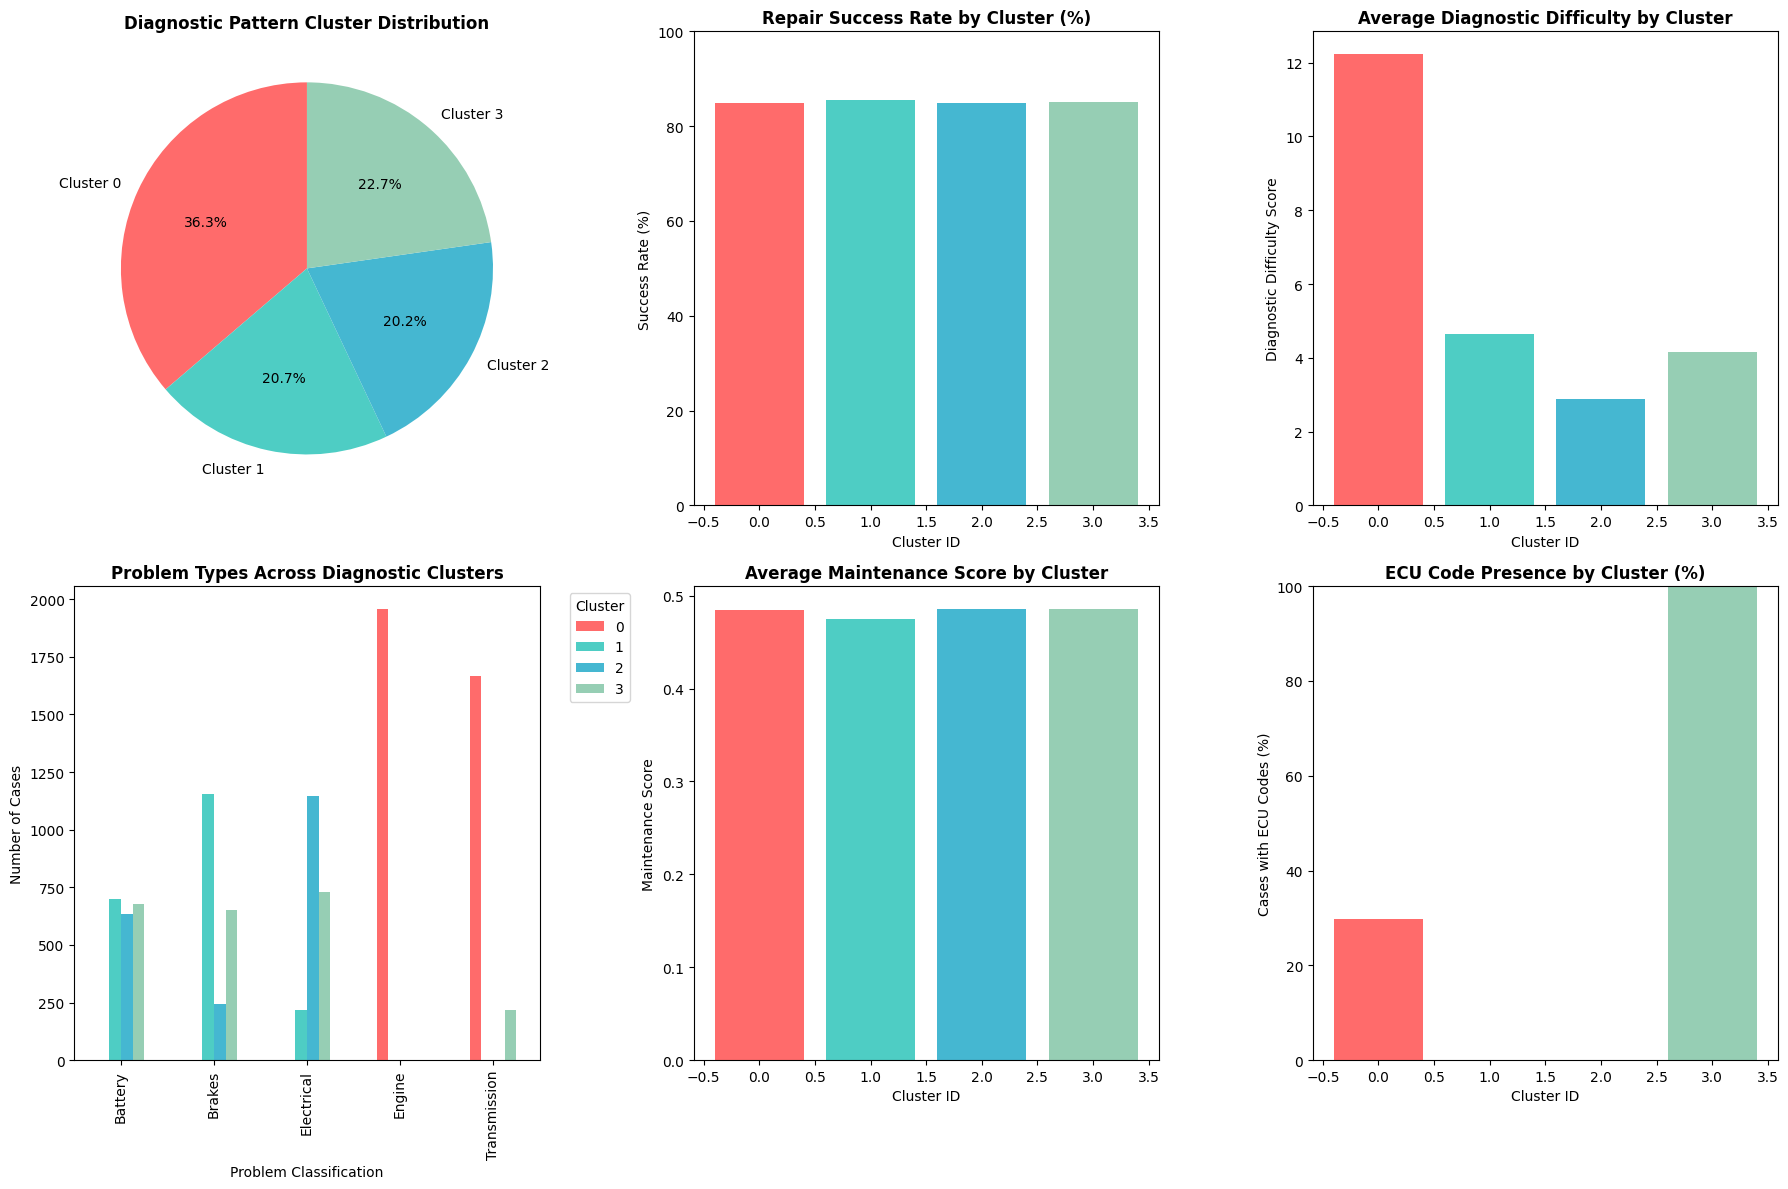

Diagnostic Cluster Profiles:
                    Avg_Age  Avg_Severity  Avg_Complexity  Avg_Difficulty  \
Diagnostic_Cluster                                                          
0                     5.045         2.699           4.540          12.238   
1                     5.703         2.663           1.768           4.636   
2                     4.396         1.309           2.252           2.882   
3                     5.045         1.964           2.213           4.158   

                    Avg_Maintenance  Success_Rate  ECU_Code_Rate Common_Brand  
Diagnostic_Cluster                                                             
0                             0.485         0.848          0.297         Ford  
1                             0.475         0.855          0.000     Mercedes  
2                             0.486         0.849          0.000        Honda  
3                             0.485         0.851          1.000         Ford  

Brand-Specific Diagnostic I

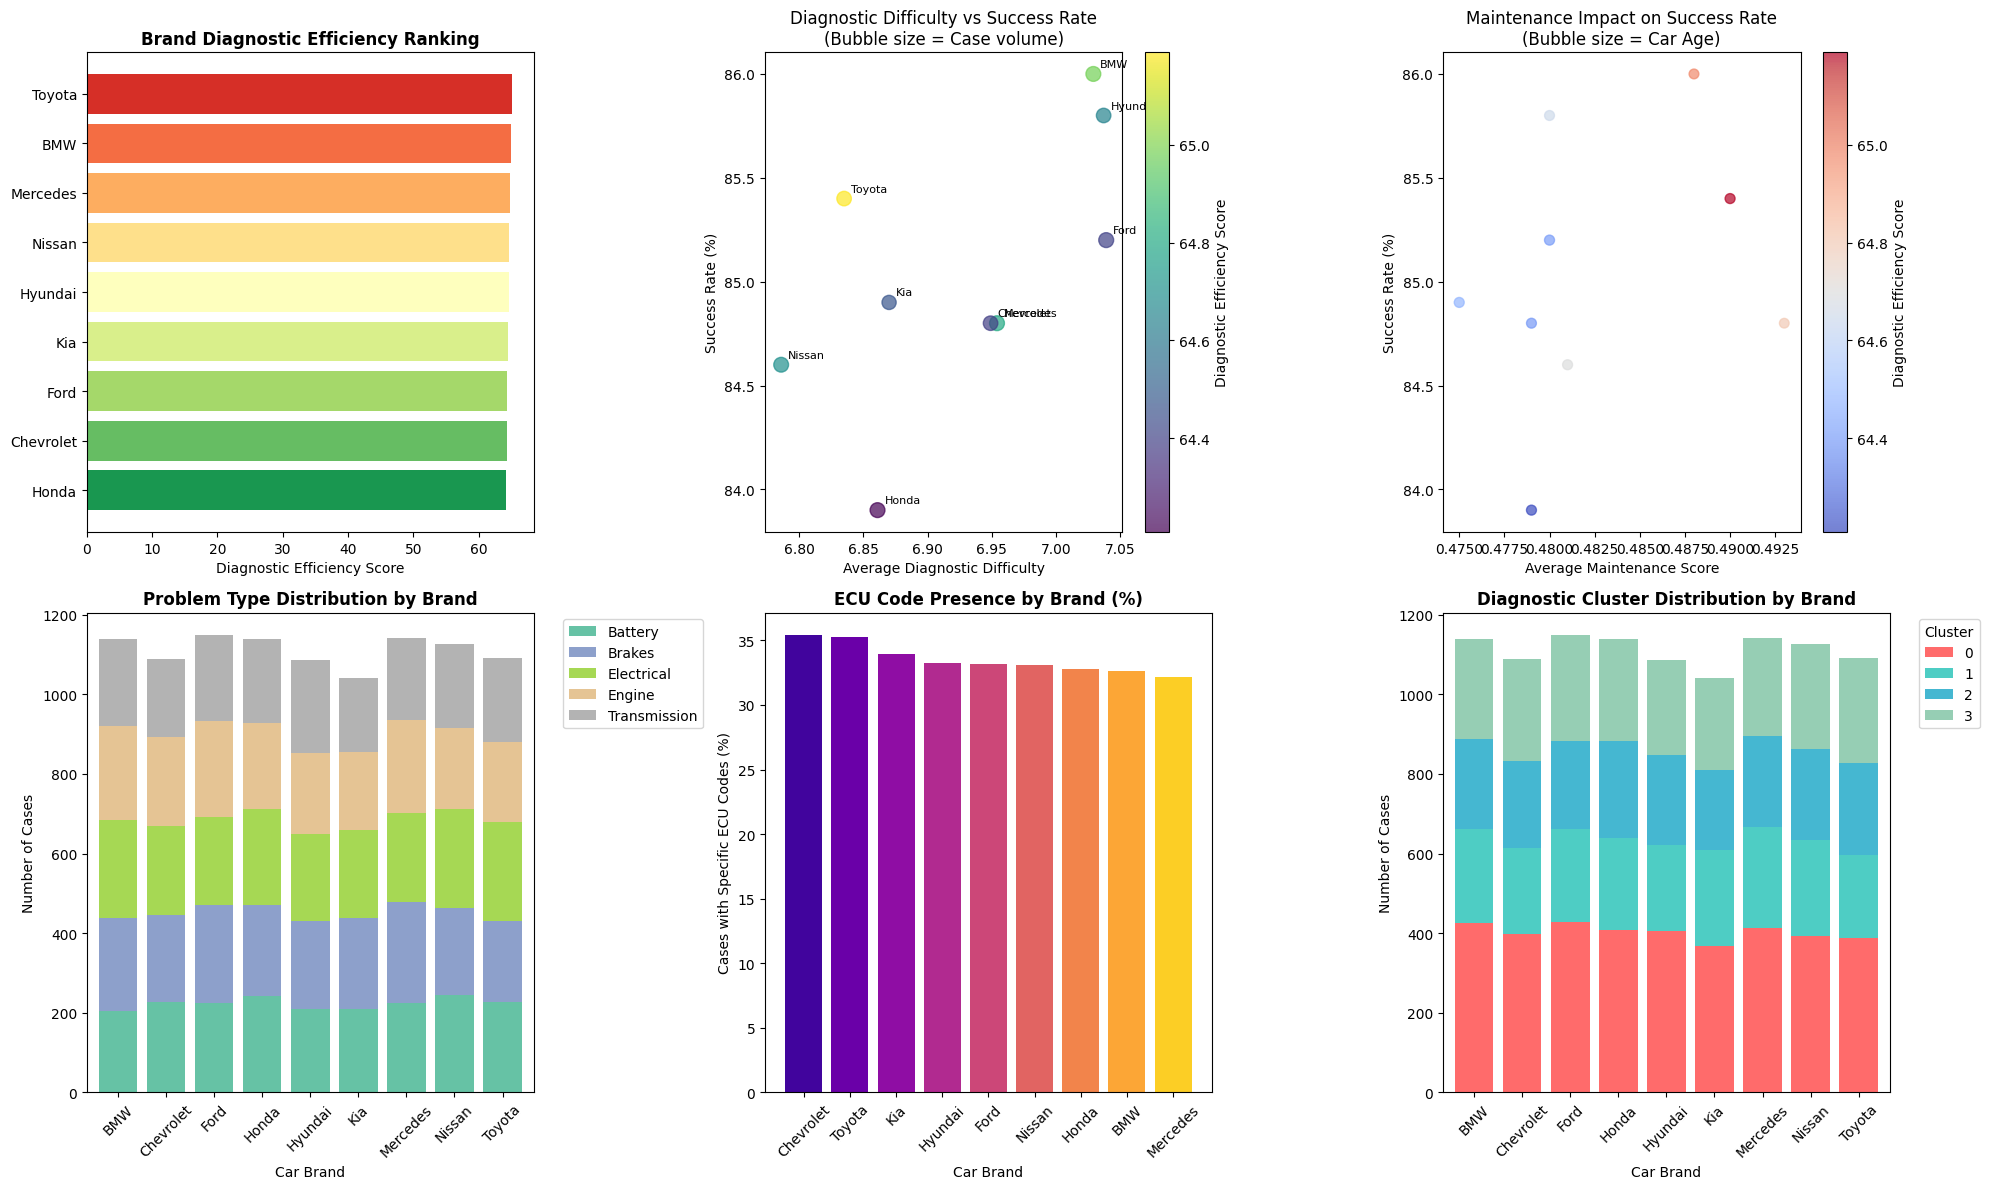

Brand Diagnostic Intelligence Summary:
           Success_Rate  Avg_Diagnostic_Difficulty  Avg_Problem_Complexity  \
Car Brand                                                                    
Toyota            0.854                      6.835                   2.961   
BMW               0.860                      7.029                   3.041   
Mercedes          0.848                      6.954                   2.972   
Nissan            0.846                      6.786                   2.920   
Hyundai           0.858                      7.037                   3.002   
Kia               0.849                      6.870                   2.935   
Ford              0.852                      7.039                   3.004   
Chevrolet         0.848                      6.949                   2.976   
Honda             0.839                      6.861                   2.939   

           Avg_Maintenance  ECU_Code_Rate  Avg_Car_Age  Case_Count  \
Car Brand                       

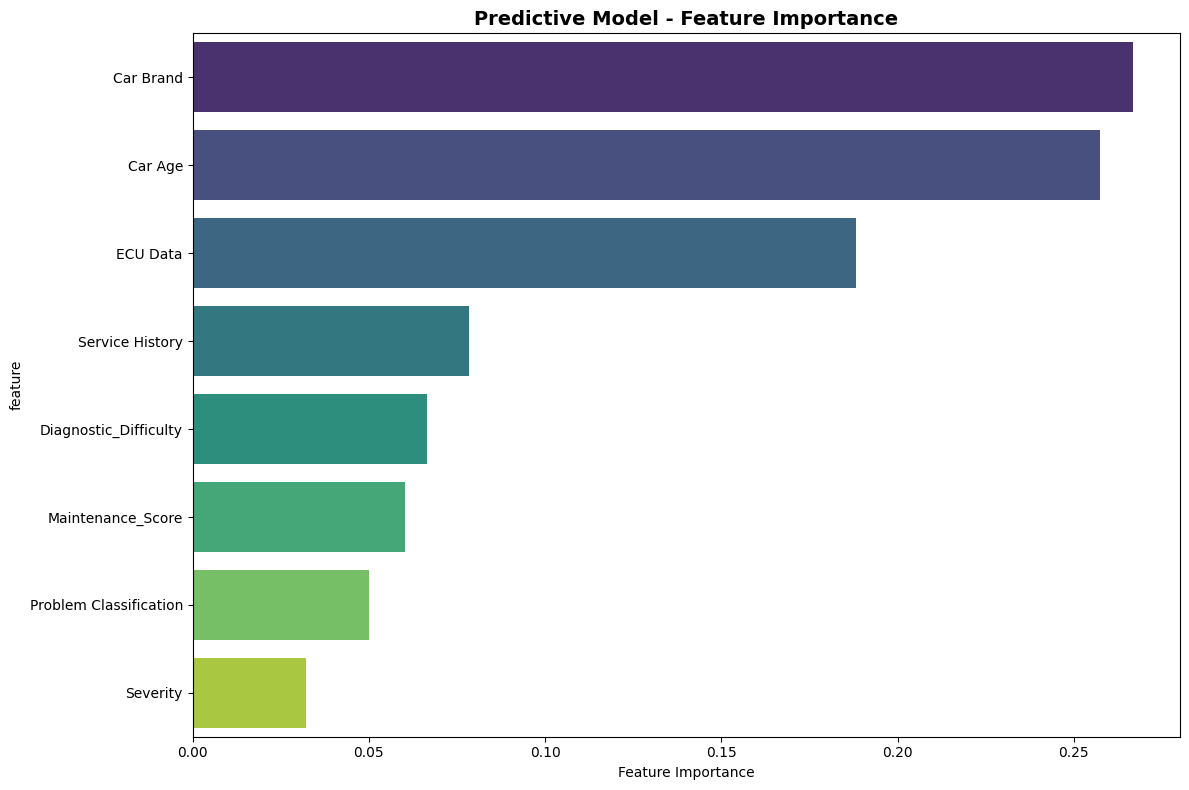

Top Predictive Features:
    1. Car Brand                 0.2668
    2. Car Age                   0.2575
    5. ECU Data                  0.1883
    6. Service History           0.0785
    7. Diagnostic_Difficulty     0.0666
    8. Maintenance_Score         0.0601
    3. Problem Classification    0.0500
    4. Severity                  0.0323

Diagnostic Efficiency Optimization Analysis


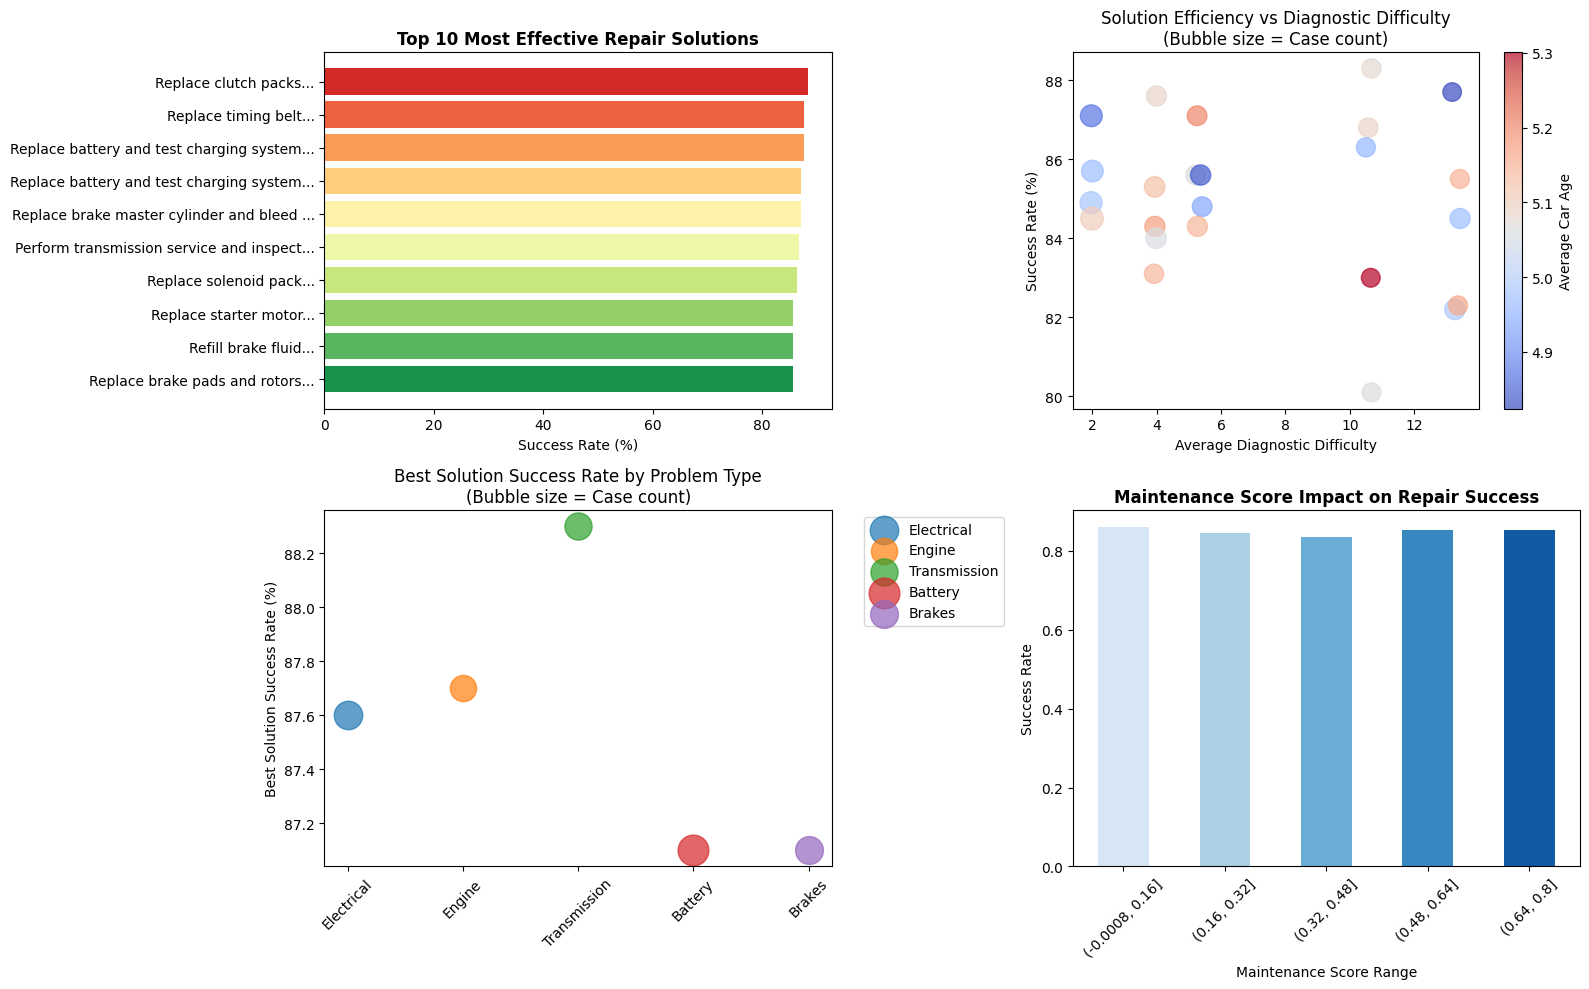

Optimal Solution Recommendations by Problem Type:

ELECTRICAL:
   Best Solution: Replace battery and test charging system
   Success Rate: 87.6%
   Based on: 420 cases
   Avg Diagnostic Difficulty: 4.0

ENGINE:
   Best Solution: Replace timing belt
   Success Rate: 87.7%
   Based on: 357 cases
   Avg Diagnostic Difficulty: 13.2

TRANSMISSION:
   Best Solution: Replace clutch packs
   Success Rate: 88.3%
   Based on: 383 cases
   Avg Diagnostic Difficulty: 10.7

BATTERY:
   Best Solution: Replace battery and test charging system
   Success Rate: 87.1%
   Based on: 490 cases
   Avg Diagnostic Difficulty: 2.0

BRAKES:
   Best Solution: Replace brake master cylinder and bleed brake system
   Success Rate: 87.1%
   Based on: 402 cases
   Avg Diagnostic Difficulty: 5.3

Comprehensive Diagnostic Intelligence Dashboard
Key Performance Indicators:
   Total Cases Analyzed: 10000
   Overall Repair Success Rate: 85.0%
   Average Diagnostic Difficulty: 6.9
   Most Common Problem Type: Electrical
  

In [1]:
# Car Diagnostic - Pattern Recognition & Predictive Analytics
# Advanced Diagnostic Intelligence System

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/kaggle/input/ml-for-car-diagnostic-agent-ai-assistant/ML Car Diagnostic Agent AI Assistant.csv')

print("Car Diagnostic Pattern Recognition & Predictive Analytics")
print("=" * 70)
print(f"Dataset loaded: {df.shape[0]:,} records")
print(f"Columns: {list(df.columns)}")

# ADVANCED DIAGNOSTIC FEATURE ENGINEERING
print("\nCreating Advanced Diagnostic Features")
print("=" * 50)

# Extract basic features from your dataset
df['Car Brand'] = df['Car Name'].str.split().str[0]
df['Car Model'] = df['Car Name'].str.split().str[1]
df['Car Year'] = df['Car Name'].str.extract(r'(\d{4})').astype(float)
df['Car Age'] = 2024 - df['Car Year']

# Create diagnostic complexity scores
problem_complexity = {
    'Battery': 1, 
    'Brakes': 2, 
    'Electrical': 3, 
    'Transmission': 4, 
    'Engine': 5
}
df['Problem_Complexity'] = df['Problem Classification'].map(problem_complexity)

# Severity scoring
severity_scores = {'Low': 1, 'Medium': 2, 'High': 3}
df['Severity_Score'] = df['Severity'].map(severity_scores)

# Diagnostic difficulty index (combining complexity and severity)
df['Diagnostic_Difficulty'] = df['Problem_Complexity'] * df['Severity_Score']

# ECU data analysis features
df['Has_Specific_ECU_Codes'] = (~df['ECU Data'].isin(['None', 'Multiple codes']) & df['ECU Data'].notna()).astype(int)
df['Multiple_ECU_Codes'] = (df['ECU Data'] == 'Multiple codes').astype(int)

# Service history impact analysis
service_history_impact = {
    'None': 0.0,
    'Regular maintenance': 0.8,
    'Oil changed 6 months ago': 0.6,
    'Brake service 1 year ago': 0.7,
    'Transmission service 2 years ago': 0.5,
    'Coolant flush last year': 0.6,
    'Spark plugs replaced 2 years ago': 0.4,
    'Battery replaced 1 year ago': 0.3
}
df['Maintenance_Score'] = df['Service History'].map(service_history_impact).fillna(0)

# Repair success metrics
df['Repair_Success'] = (df['Repair Status'] == 'Fixed').astype(int)
df['Repair_Efficiency'] = df['Repair_Success'] * (1 - (df['Diagnostic_Difficulty'] / 15))

# Brand reliability indicators
brand_reliability = df.groupby('Car Brand')['Repair_Success'].transform('mean')
df['Brand_Reliability_Score'] = brand_reliability

print("Advanced diagnostic features created:")
print(f"   - Diagnostic Difficulty range: {df['Diagnostic_Difficulty'].min()} to {df['Diagnostic_Difficulty'].max()}")
print(f"   - Average Maintenance Score: {df['Maintenance_Score'].mean():.2f}")
print(f"   - Overall Repair Success Rate: {df['Repair_Success'].mean():.1%}")

# 1. DIAGNOSTIC PATTERN CLUSTERING ANALYSIS
print("\nDiagnostic Pattern Clustering Analysis")
print("=" * 50)

# Prepare features for clustering
cluster_features = [
    'Car Age', 'Severity_Score', 'Problem_Complexity', 
    'Diagnostic_Difficulty', 'Maintenance_Score', 'Has_Specific_ECU_Codes'
]

X_cluster = df[cluster_features].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Diagnostic_Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_analysis = df.groupby('Diagnostic_Cluster').agg({
    'Car Age': 'mean',
    'Severity_Score': 'mean',
    'Problem_Complexity': 'mean',
    'Diagnostic_Difficulty': 'mean',
    'Maintenance_Score': 'mean',
    'Repair_Success': 'mean',
    'Has_Specific_ECU_Codes': 'mean',
    'Car Brand': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Mixed'
}).round(3)

cluster_analysis.columns = [
    'Avg_Age', 'Avg_Severity', 'Avg_Complexity', 'Avg_Difficulty',
    'Avg_Maintenance', 'Success_Rate', 'ECU_Code_Rate', 'Common_Brand'
]

plt.figure(figsize=(18, 12))

# Cluster distribution
plt.subplot(2, 3, 1)
cluster_counts = df['Diagnostic_Cluster'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
plt.pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Diagnostic Pattern Cluster Distribution', fontweight='bold')

# Success rate by cluster
plt.subplot(2, 3, 2)
success_by_cluster = df.groupby('Diagnostic_Cluster')['Repair_Success'].mean()
plt.bar(success_by_cluster.index, success_by_cluster.values * 100, color=colors)
plt.title('Repair Success Rate by Cluster (%)', fontweight='bold')
plt.xlabel('Cluster ID')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)

# Diagnostic difficulty by cluster
plt.subplot(2, 3, 3)
difficulty_by_cluster = df.groupby('Diagnostic_Cluster')['Diagnostic_Difficulty'].mean()
plt.bar(difficulty_by_cluster.index, difficulty_by_cluster.values, color=colors)
plt.title('Average Diagnostic Difficulty by Cluster', fontweight='bold')
plt.xlabel('Cluster ID')
plt.ylabel('Diagnostic Difficulty Score')

# Problem type distribution across clusters
plt.subplot(2, 3, 4)
problem_cluster_matrix = pd.crosstab(df['Problem Classification'], df['Diagnostic_Cluster'])
problem_cluster_matrix.plot(kind='bar', ax=plt.gca(), color=colors)
plt.title('Problem Types Across Diagnostic Clusters', fontweight='bold')
plt.xlabel('Problem Classification')
plt.ylabel('Number of Cases')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Maintenance score impact
plt.subplot(2, 3, 5)
maintenance_impact = df.groupby('Diagnostic_Cluster')['Maintenance_Score'].mean()
plt.bar(maintenance_impact.index, maintenance_impact.values, color=colors)
plt.title('Average Maintenance Score by Cluster', fontweight='bold')
plt.xlabel('Cluster ID')
plt.ylabel('Maintenance Score')

# ECU codes presence by cluster
plt.subplot(2, 3, 6)
ecu_by_cluster = df.groupby('Diagnostic_Cluster')['Has_Specific_ECU_Codes'].mean()
plt.bar(ecu_by_cluster.index, ecu_by_cluster.values * 100, color=colors)
plt.title('ECU Code Presence by Cluster (%)', fontweight='bold')
plt.xlabel('Cluster ID')
plt.ylabel('Cases with ECU Codes (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

print("Diagnostic Cluster Profiles:")
print(cluster_analysis)

# 2. BRAND-SPECIFIC DIAGNOSTIC INTELLIGENCE
print("\nBrand-Specific Diagnostic Intelligence")
print("=" * 55)

brand_diagnostics = df.groupby('Car Brand').agg({
    'Repair_Success': 'mean',
    'Diagnostic_Difficulty': 'mean',
    'Problem_Complexity': 'mean',
    'Maintenance_Score': 'mean',
    'Has_Specific_ECU_Codes': 'mean',
    'Car Age': 'mean',
    'Record ID': 'count'
}).round(3)

brand_diagnostics.columns = [
    'Success_Rate', 'Avg_Diagnostic_Difficulty', 'Avg_Problem_Complexity',
    'Avg_Maintenance', 'ECU_Code_Rate', 'Avg_Car_Age', 'Case_Count'
]

# Calculate brand diagnostic efficiency score
brand_diagnostics['Diagnostic_Efficiency_Score'] = (
    brand_diagnostics['Success_Rate'] * 0.4 +
    (1 - brand_diagnostics['Avg_Diagnostic_Difficulty'] / 15) * 0.3 +
    brand_diagnostics['Avg_Maintenance'] * 0.3
) * 100

brand_diagnostics = brand_diagnostics.sort_values('Diagnostic_Efficiency_Score', ascending=False)

plt.figure(figsize=(20, 12))

# Brand diagnostic efficiency comparison
plt.subplot(2, 3, 1)
efficiency_sorted = brand_diagnostics.nlargest(9, 'Diagnostic_Efficiency_Score')['Diagnostic_Efficiency_Score']
plt.barh(range(len(efficiency_sorted)), efficiency_sorted.values, 
         color=sns.color_palette("RdYlGn", len(efficiency_sorted)))
plt.yticks(range(len(efficiency_sorted)), efficiency_sorted.index)
plt.xlabel('Diagnostic Efficiency Score')
plt.title('Brand Diagnostic Efficiency Ranking', fontweight='bold')
plt.gca().invert_yaxis()

# Success rate vs diagnostic difficulty
plt.subplot(2, 3, 2)
plt.scatter(brand_diagnostics['Avg_Diagnostic_Difficulty'], 
           brand_diagnostics['Success_Rate'] * 100,
           s=brand_diagnostics['Case_Count']/10, alpha=0.7,
           c=brand_diagnostics['Diagnostic_Efficiency_Score'], cmap='viridis')
plt.colorbar(label='Diagnostic Efficiency Score')
plt.xlabel('Average Diagnostic Difficulty')
plt.ylabel('Success Rate (%)')
plt.title('Diagnostic Difficulty vs Success Rate\n(Bubble size = Case volume)')

# Add brand labels
for i, brand in enumerate(brand_diagnostics.index):
    plt.annotate(brand, 
                (brand_diagnostics['Avg_Diagnostic_Difficulty'].iloc[i], 
                 brand_diagnostics['Success_Rate'].iloc[i] * 100),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Maintenance impact on success rate
plt.subplot(2, 3, 3)
plt.scatter(brand_diagnostics['Avg_Maintenance'], 
           brand_diagnostics['Success_Rate'] * 100,
           s=brand_diagnostics['Avg_Car_Age'] * 10, alpha=0.7,
           c=brand_diagnostics['Diagnostic_Efficiency_Score'], cmap='coolwarm')
plt.colorbar(label='Diagnostic Efficiency Score')
plt.xlabel('Average Maintenance Score')
plt.ylabel('Success Rate (%)')
plt.title('Maintenance Impact on Success Rate\n(Bubble size = Car Age)')

# Problem type distribution by brand
plt.subplot(2, 3, 4)
problem_brand_matrix = pd.crosstab(df['Car Brand'], df['Problem Classification'])
problem_brand_matrix.plot(kind='bar', stacked=True, ax=plt.gca(), 
                         colormap='Set2', width=0.8)
plt.title('Problem Type Distribution by Brand', fontweight='bold')
plt.xlabel('Car Brand')
plt.ylabel('Number of Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# ECU code analysis by brand
plt.subplot(2, 3, 5)
ecu_brand_analysis = df.groupby('Car Brand')['Has_Specific_ECU_Codes'].mean().sort_values(ascending=False)
plt.bar(ecu_brand_analysis.index, ecu_brand_analysis.values * 100, 
        color=sns.color_palette("plasma", len(ecu_brand_analysis)))
plt.title('ECU Code Presence by Brand (%)', fontweight='bold')
plt.xlabel('Car Brand')
plt.ylabel('Cases with Specific ECU Codes (%)')
plt.xticks(rotation=45)

# Diagnostic cluster distribution by brand
plt.subplot(2, 3, 6)
cluster_brand_matrix = pd.crosstab(df['Car Brand'], df['Diagnostic_Cluster'])
cluster_brand_matrix.plot(kind='bar', stacked=True, ax=plt.gca(), 
                         color=colors, width=0.8)
plt.title('Diagnostic Cluster Distribution by Brand', fontweight='bold')
plt.xlabel('Car Brand')
plt.ylabel('Number of Cases')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Brand Diagnostic Intelligence Summary:")
print(brand_diagnostics.round(3))

# 3. PREDICTIVE DIAGNOSTIC MODEL
print("\nPredictive Diagnostic Model")
print("=" * 45)

# Prepare data for predictive modeling
predictive_features = [
    'Car Brand', 'Car Age', 'Problem Classification', 'Severity',
    'ECU Data', 'Service History', 'Diagnostic_Difficulty', 'Maintenance_Score'
]

X = df[predictive_features].copy()
y = df['Repair_Success']

# Encode categorical variables
label_encoders = {}
for col in ['Car Brand', 'Problem Classification', 'Severity', 'ECU Data', 'Service History']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Handle missing values
X = X.fillna(-1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]:,} records")
print(f"Test set: {X_test.shape[0]:,} records")
print(f"Baseline accuracy: {y_test.mean():.3f}")

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fixed', 'Fixed']))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Predictive Model - Feature Importance', fontweight='bold', fontsize=14)
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top Predictive Features:")
for i, row in feature_importance.head(8).iterrows():
    print(f"   {i+1:2}. {row['feature']:25} {row['importance']:.4f}")

# 4. DIAGNOSTIC EFFICIENCY OPTIMIZATION
print("\nDiagnostic Efficiency Optimization Analysis")
print("=" * 55)

# Analyze solution effectiveness
solution_effectiveness = df.groupby(['Problem Classification', 'How to Fix the Problem']).agg({
    'Repair_Success': ['mean', 'count'],
    'Diagnostic_Difficulty': 'mean',
    'Car Age': 'mean'
}).round(3)

solution_effectiveness.columns = ['Success_Rate', 'Case_Count', 'Avg_Diagnostic_Difficulty', 'Avg_Car_Age']
solution_effectiveness = solution_effectiveness.reset_index()

# Filter for reliable recommendations (minimum 5 cases)
reliable_solutions = solution_effectiveness[solution_effectiveness['Case_Count'] >= 5]

plt.figure(figsize=(16, 10))

# Most effective solutions by problem type
plt.subplot(2, 2, 1)
top_solutions = reliable_solutions.nlargest(10, 'Success_Rate')
plt.barh(range(len(top_solutions)), top_solutions['Success_Rate'] * 100,
         color=sns.color_palette("RdYlGn", len(top_solutions)))
plt.yticks(range(len(top_solutions)), top_solutions['How to Fix the Problem'].str[:40] + '...')
plt.xlabel('Success Rate (%)')
plt.title('Top 10 Most Effective Repair Solutions', fontweight='bold')
plt.gca().invert_yaxis()

# Solution efficiency vs diagnostic difficulty
plt.subplot(2, 2, 2)
plt.scatter(reliable_solutions['Avg_Diagnostic_Difficulty'], 
           reliable_solutions['Success_Rate'] * 100,
           s=reliable_solutions['Case_Count']/2, alpha=0.7,
           c=reliable_solutions['Avg_Car_Age'], cmap='coolwarm')
plt.colorbar(label='Average Car Age')
plt.xlabel('Average Diagnostic Difficulty')
plt.ylabel('Success Rate (%)')
plt.title('Solution Efficiency vs Diagnostic Difficulty\n(Bubble size = Case count)')

# Problem-specific solution effectiveness
plt.subplot(2, 2, 3)
for problem_type in df['Problem Classification'].unique():
    problem_data = reliable_solutions[reliable_solutions['Problem Classification'] == problem_type]
    if len(problem_data) > 0:
        best_solution = problem_data.nlargest(1, 'Success_Rate')
        plt.scatter(problem_type, best_solution['Success_Rate'].values[0] * 100,
                   s=best_solution['Case_Count'].values[0], alpha=0.7,
                   label=problem_type)

plt.xticks(rotation=45)
plt.ylabel('Best Solution Success Rate (%)')
plt.title('Best Solution Success Rate by Problem Type\n(Bubble size = Case count)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Maintenance impact on diagnostic success
plt.subplot(2, 2, 4)
maintenance_bins = pd.cut(df['Maintenance_Score'], bins=5)
maintenance_success = df.groupby(maintenance_bins)['Repair_Success'].mean()
maintenance_success.plot(kind='bar', color=sns.color_palette("Blues", len(maintenance_success)))
plt.title('Maintenance Score Impact on Repair Success', fontweight='bold')
plt.xlabel('Maintenance Score Range')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Optimal Solution Recommendations by Problem Type:")
for problem in df['Problem Classification'].unique():
    problem_solutions = reliable_solutions[reliable_solutions['Problem Classification'] == problem]
    if len(problem_solutions) > 0:
        best_solution = problem_solutions.nlargest(1, 'Success_Rate').iloc[0]
        print(f"\n{problem.upper()}:")
        print(f"   Best Solution: {best_solution['How to Fix the Problem']}")
        print(f"   Success Rate: {best_solution['Success_Rate']:.1%}")
        print(f"   Based on: {best_solution['Case_Count']} cases")
        print(f"   Avg Diagnostic Difficulty: {best_solution['Avg_Diagnostic_Difficulty']:.1f}")

# 5. COMPREHENSIVE DIAGNOSTIC INTELLIGENCE DASHBOARD
print("\nComprehensive Diagnostic Intelligence Dashboard")
print("=" * 60)

# Create summary statistics
dashboard_stats = {
    'Total Cases Analyzed': len(df),
    'Overall Repair Success Rate': f"{df['Repair_Success'].mean():.1%}",
    'Average Diagnostic Difficulty': f"{df['Diagnostic_Difficulty'].mean():.1f}",
    'Most Common Problem Type': df['Problem Classification'].mode()[0],
    'Average Car Age': f"{df['Car Age'].mean():.1f} years",
    'Cases with ECU Codes': f"{df['Has_Specific_ECU_Codes'].sum():,}",
    'Predictive Model Accuracy': f"{accuracy:.1%}",
    'Most Reliable Brand': brand_diagnostics.index[0],
    'Highest Success Solution': reliable_solutions.nlargest(1, 'Success_Rate')['How to Fix the Problem'].values[0][:50] + '...'
}

print("Key Performance Indicators:")
for key, value in dashboard_stats.items():
    print(f"   {key}: {value}")

print("\nRecommendations for Diagnostic Optimization:")
print("   1. Focus on high-success solutions for each problem cluster")
print("   2. Implement predictive model for repair success probability")
print("   3. Use diagnostic clusters for resource allocation")
print("   4. Leverage brand-specific diagnostic patterns")
print("   5. Monitor maintenance score impact on repair outcomes")

print(f"\nAnalysis Completed Successfully!")
print(f"Ready for deployment with {accuracy:.1%} predictive accuracy")